In [11]:
install.packages("FactoMineR", repos = "http://cran.r-project.org")
install.packages("factoextra", repos = "http://cran.r-project.org") # Install factoextra
install.packages("rpart.plot", repos = "http://cran.r-project.org") # Install rpart.plot
install.packages("klaR", repos = "http://cran.r-project.org") # Install rpart.plot


# Carregando bibliotecas necessárias
library(tidyverse)
library(ggplot2)
library(knitr)
library(cluster)
library(FactoMineR)
library(factoextra)
library(rpart)
library(rpart.plot)
library(dplyr)
library(klaR)
library("readxl")

# Leitura do arquivo de dados
dados_originais <- read_excel("upwork_data.xlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘R.cache’, ‘e1071’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [12]:
# Leitura do arquivo de dados
dados_originais <- read_excel("upwork_data.xlsx")

In [13]:
# Visualizando a estrutura inicial dos dados
head(dados_originais)
str(dados_originais)

# Reorganizando os dados para que cada funcionário tenha apenas uma linha
dados_reorganizados <- dados_originais %>%
  group_by(ID, dept_ID, Division_ID, office_ID) %>%
  summarise(
    Atividade1 = first(activity_ID),
    Atividade2 = nth(activity_ID, 2),
    Atividade3 = nth(activity_ID, 3),
    .groups = 'drop'
  )

# Visualizando os dados reorganizados
head(dados_reorganizados)




ID,activity_ID,Division_ID,dept_ID,office_ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,40,30,4,12
1,1,30,4,12
1,22,30,4,12
2,1,30,4,2
2,37,30,4,2
2,6,30,4,2


tibble [12,033 × 5] (S3: tbl_df/tbl/data.frame)
 $ ID         : num [1:12033] 1 1 1 2 2 2 3 3 3 4 ...
 $ activity_ID: num [1:12033] 40 1 22 1 37 6 26 9 41 30 ...
 $ Division_ID: num [1:12033] 30 30 30 30 30 30 28 28 28 48 ...
 $ dept_ID    : num [1:12033] 4 4 4 4 4 4 4 4 4 20 ...
 $ office_ID  : num [1:12033] 12 12 12 2 2 2 19 19 19 2 ...


ID,dept_ID,Division_ID,office_ID,Atividade1,Atividade2,Atividade3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,30,12,40,1,22
2,4,30,2,1,37,6
3,4,28,19,26,9,41
4,20,48,2,30,25,26
5,20,49,19,35,43,11
6,20,49,9,40,25,36


In [14]:
# Preparando os dados para análise de frequência das atividades
todas_atividades <- data.frame(
  Atividade = c(dados_reorganizados$Atividade1,
                dados_reorganizados$Atividade2,
                dados_reorganizados$Atividade3)
)

# Calculando frequências das atividades
freq_atividades <- todas_atividades %>%
  group_by(Atividade) %>%
  summarise(Frequencia = n()) %>%
  arrange(desc(Frequencia))



In [15]:
# Filtrando atividades com mais de 100 ocorrências
atividades_frequentes <- freq_atividades %>%
  filter(Frequencia > 100)

# Identificando atividades raras (menos de 100 ocorrências)
atividades_raras <- freq_atividades %>%
  filter(Frequencia <= 100)

# Criando uma lista de atividades raras para substituição
lista_raras <- atividades_raras$Atividade





Table: Atividades com mais de 100 ocorrências

| Atividade| Frequencia|
|---------:|----------:|
|        26|        825|
|        40|        637|
|        41|        623|
|        20|        620|
|        22|        606|
|        18|        594|
|        36|        585|
|         1|        542|
|        43|        438|
|         6|        405|
|        32|        369|
|        14|        344|
|        33|        344|
|        31|        321|
|        28|        317|
|        37|        313|
|         2|        289|
|        42|        271|
|        38|        266|
|         3|        262|
|         8|        262|
|        27|        230|
|        39|        209|
|        30|        206|
|        29|        200|
|        11|        188|
|        34|        171|
|        23|        169|
|         9|        158|
|         7|        128|
|        15|        117|
|        25|        117|
|        13|        109|
|        44|        108|
|        16|        101|

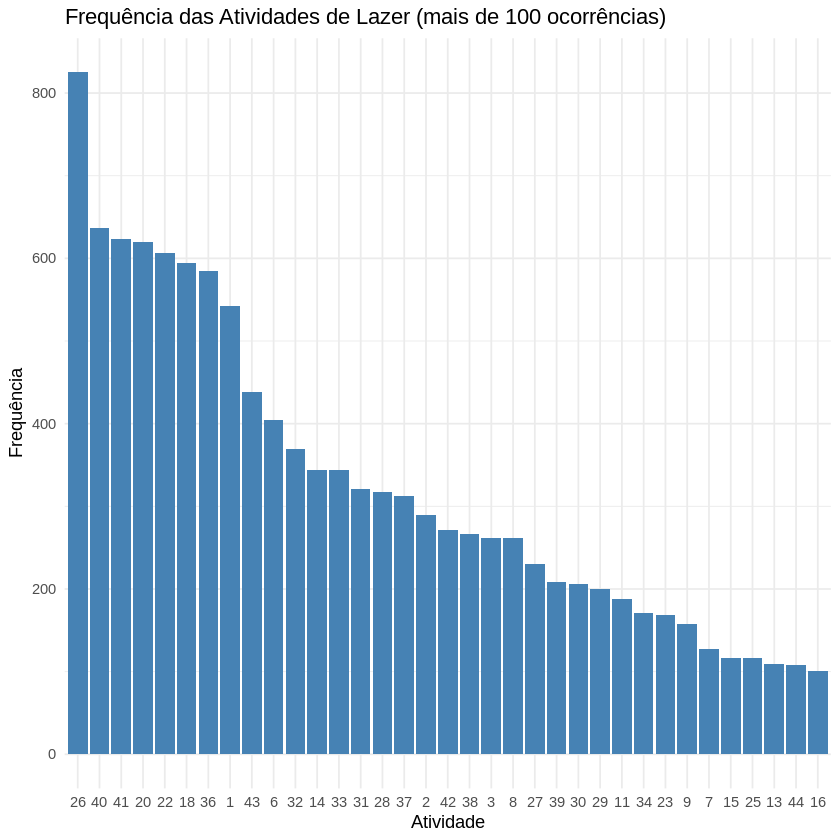

In [16]:
# Tabela de frequência das atividades mais comuns
kable(atividades_frequentes, caption = "Atividades com mais de 100 ocorrências")

# Gráfico de frequência das atividades mais comuns
ggplot(atividades_frequentes, aes(x = reorder(Atividade, -Frequencia), y = Frequencia)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequência das Atividades de Lazer (mais de 100 ocorrências)",
       x = "Atividade", y = "Frequência") +
  theme_minimal()





Table: Frequência de Funcionários por Departamento

| dept_ID| Frequencia|
|-------:|----------:|
|       4|       1332|
|       3|        939|
|      21|        349|
|      15|        255|
|       1|        174|
|      10|        152|
|      17|        149|
|       8|        140|
|      19|        133|
|       6|         96|
|      20|         84|
|      13|         42|
|       7|         37|
|      14|         30|
|      11|         26|
|      16|         25|
|       2|         24|
|       5|         14|
|       9|          5|
|      18|          4|
|      12|          1|

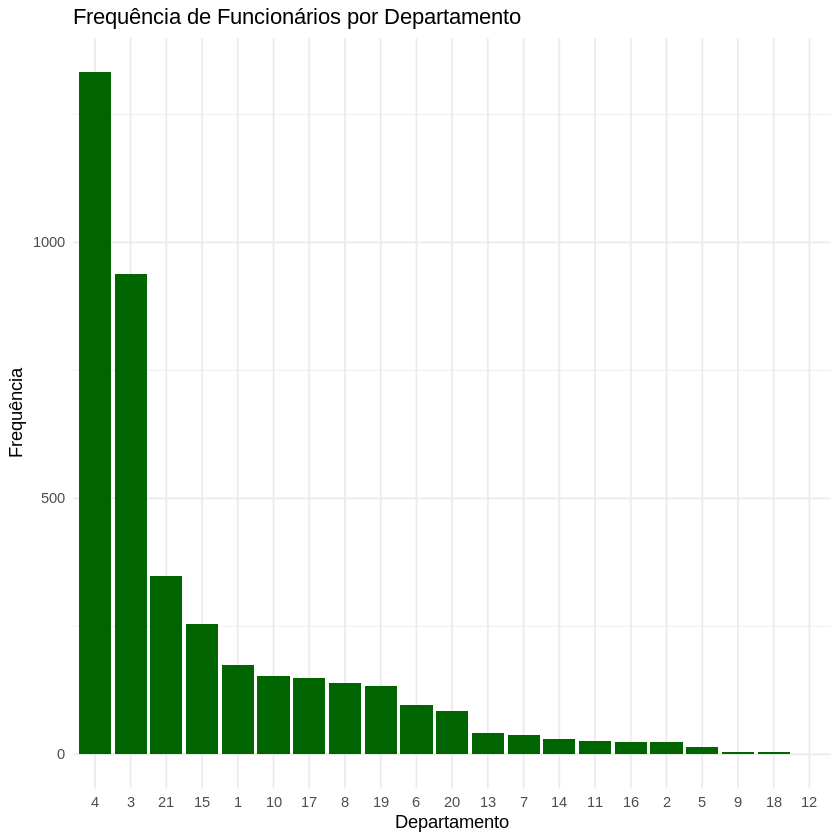

In [17]:
# Análise dos departamentos, divisões e escritórios
# Frequência dos departamentos
freq_departamentos <- dados_reorganizados %>%
  group_by(dept_ID) %>%
  summarise(Frequencia = n()) %>%
  arrange(desc(Frequencia))

kable(freq_departamentos, caption = "Frequência de Funcionários por Departamento")

# Gráfico de departamentos
ggplot(freq_departamentos, aes(x = reorder(dept_ID, -Frequencia), y = Frequencia)) +
  geom_bar(stat = "identity", fill = "darkgreen") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequência de Funcionários por Departamento",
       x = "Departamento", y = "Frequência") +
  theme_minimal()





Table: Frequência de Funcionários por Divisão

| Division_ID| Frequencia|
|-----------:|----------:|
|          18|        487|
|          29|        407|
|          28|        240|
|          87|        207|
|          74|        192|
|          30|        171|
|          91|        167|
|          22|        166|
|          21|        133|
|          17|        102|
|          26|         91|
|          56|         81|
|          49|         64|
|          23|         62|
|          10|         59|
|           1|         58|
|          79|         56|
|          20|         55|
|          81|         54|
|          67|         50|
|          86|         50|
|          19|         45|
|          25|         44|
|          65|         44|
|          55|         40|
|          38|         37|
|          77|         37|
|          88|         36|
|          82|         34|
|           7|         30|
|          90|         30|
|          73|         29|
|           3|         27|
|     

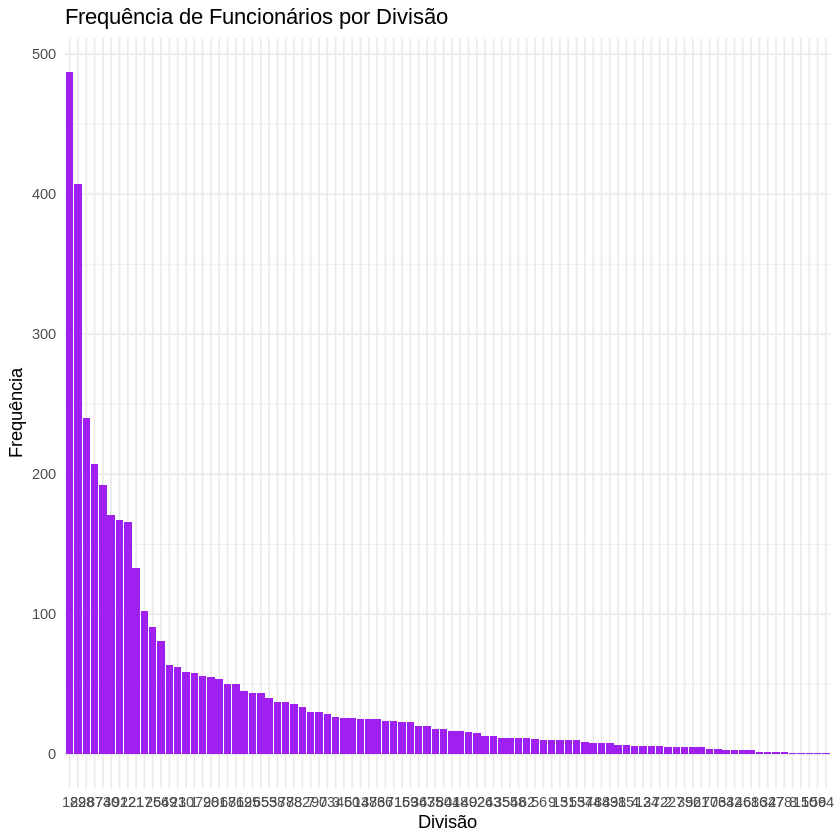

In [18]:
# Frequência das divisões
freq_divisoes <- dados_reorganizados %>%
  group_by(Division_ID) %>%
  summarise(Frequencia = n()) %>%
  arrange(desc(Frequencia))

kable(freq_divisoes, caption = "Frequência de Funcionários por Divisão")

# Gráfico de divisões
ggplot(freq_divisoes, aes(x = reorder(Division_ID, -Frequencia), y = Frequencia)) +
  geom_bar(stat = "identity", fill = "purple") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequência de Funcionários por Divisão",
       x = "Divisão", y = "Frequência") +
  theme_minimal()





Table: Frequência de Funcionários por Escritório

| office_ID| Frequencia|
|---------:|----------:|
|        19|       1280|
|         2|        897|
|        12|        413|
|         7|        395|
|        16|        347|
|        20|        278|
|         8|         77|
|         5|         65|
|        17|         53|
|        11|         51|
|         4|         40|
|        13|         29|
|        18|         18|
|         3|         15|
|         9|         15|
|        10|         12|
|         6|          9|
|        14|          9|
|        15|          7|
|         1|          1|

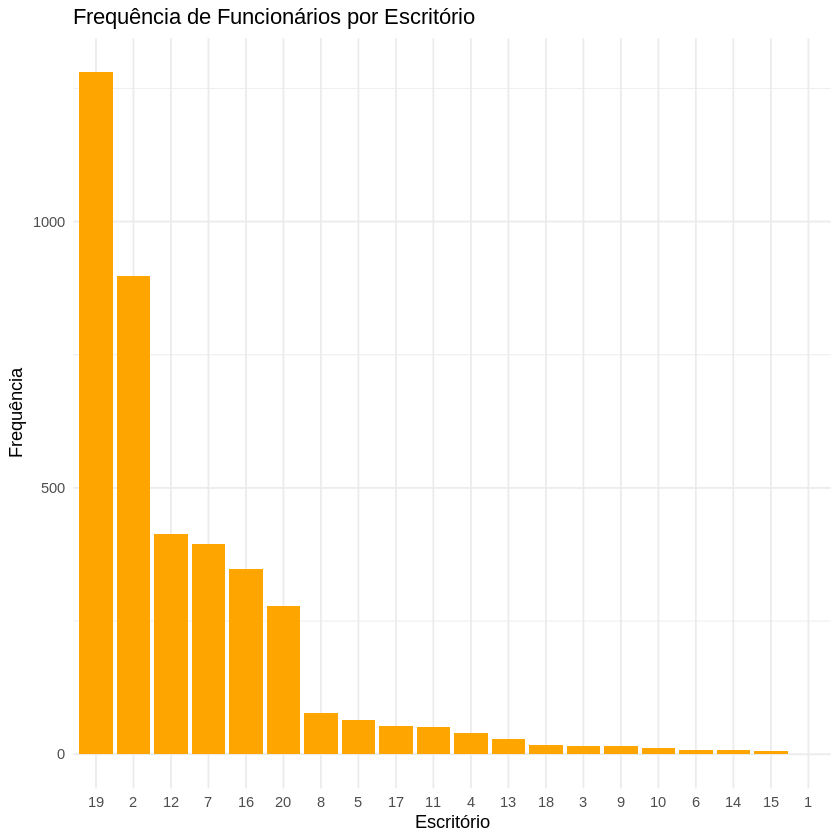

In [19]:
# Frequência dos escritórios
freq_escritorios <- dados_reorganizados %>%
  group_by(office_ID) %>%
  summarise(Frequencia = n()) %>%
  arrange(desc(Frequencia))

kable(freq_escritorios, caption = "Frequência de Funcionários por Escritório")

# Gráfico de escritórios
ggplot(freq_escritorios, aes(x = reorder(office_ID, -Frequencia), y = Frequencia)) +
  geom_bar(stat = "identity", fill = "orange") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Frequência de Funcionários por Escritório",
       x = "Escritório", y = "Frequência") +
  theme_minimal()



In [20]:
# Preparação para Agrupamento
# Substituindo atividades raras por "Other"
dados_preparados <- dados_reorganizados %>%
  mutate(
    Atividade1 = ifelse(Atividade1 %in% lista_raras, "Other", Atividade1),
    Atividade2 = ifelse(Atividade2 %in% lista_raras, "Other", Atividade2),
    Atividade3 = ifelse(Atividade3 %in% lista_raras, "Other", Atividade3)
  )

# Criando um dataframe apenas com as atividades para o agrupamento
dados_atividades <- dados_preparados %>%
  dplyr::select(Atividade1, Atividade2, Atividade3)

# Convertendo para fator
dados_atividades[] <- lapply(dados_atividades, factor)



Warning message:
“did not converge in 10 iterations”


Número ótimo de clusters: 9 


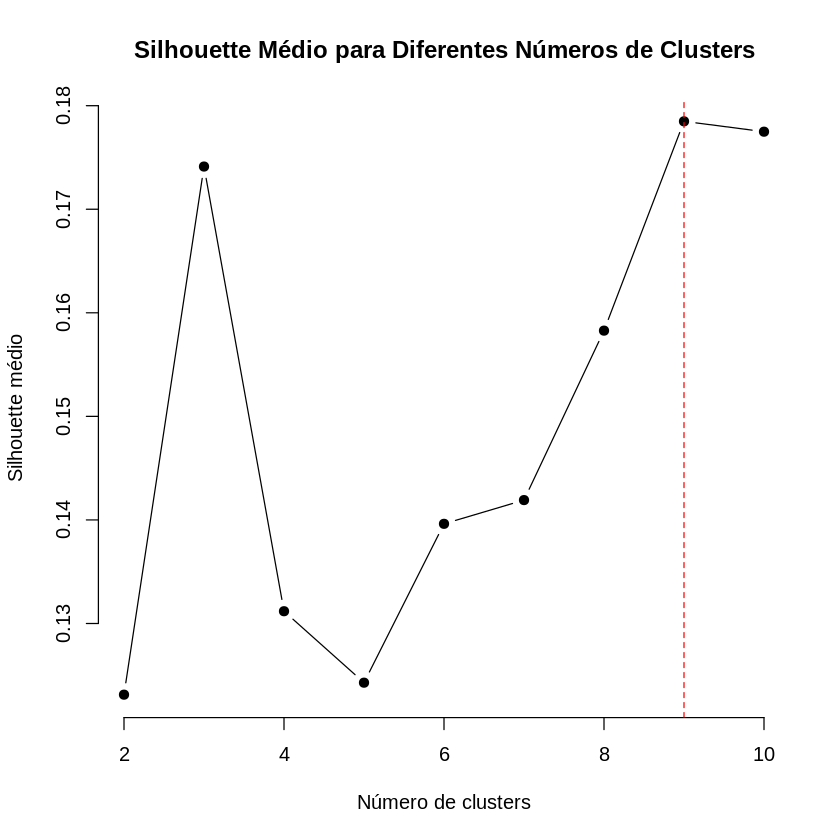

In [21]:
# Aplicando MCA + K-means
# Esta abordagem é robusta e pode ser utilizada para dados categóricos, pois
# a MCA transforma os dados categóricos em coordenadas numéricas
# que capturam as relações entre as categorias, permitindo que o K-means
# encontre grupos significativos.

# Aplicando MCA nos dados de atividades
mca_result <- MCA(dados_atividades, graph = FALSE, ncp = 10)

# Obtendo as coordenadas dos indivíduos na MCA
ind_coords <- as.data.frame(mca_result$ind$coord)

# Função para calcular o silhouette médio para diferentes números de clusters (usando K-means)
silhouette_scores_kmeans <- function(data, max_clusters = 10) {
  scores <- numeric(max_clusters - 1)

  for (k in 2:max_clusters) {
    kmeans_result <- kmeans(data, centers = k, nstart = 25)
    sil <- silhouette(kmeans_result$cluster, dist(data, method = "euclidean"))
    scores[k - 1] <- mean(sil[, 3])
  }

  return(scores)
}

# Calculando os scores de silhouette para diferentes números de clusters
sil_scores <- silhouette_scores_kmeans(ind_coords, max_clusters = 10)

# Visualizando os scores de silhouette
plot(2:10, sil_scores, type = "b", pch = 19, frame = FALSE,
     xlab = "Número de clusters", ylab = "Silhouette médio",
     main = "Silhouette Médio para Diferentes Números de Clusters")
abline(v = which.max(sil_scores) + 1, col = "red", lty = 2)

# Determinando o número ótimo de clusters
num_clusters <- which.max(sil_scores) + 1
cat("Número ótimo de clusters:", num_clusters, "\n")





Table: Características dos Clusters Identificados

|Cluster |    N|Atividade1_MaisComum |Atividade2_MaisComum |Atividade3_MaisComum |Departamento_MaisComum |Divisao_MaisComum |Escritorio_MaisComum |
|:-------|----:|:--------------------|:--------------------|:--------------------|:----------------------|:-----------------|:--------------------|
|1       | 2379|20                   |26                   |22                   |4                      |18                |19                   |
|2       |  829|36                   |22                   |41                   |4                      |29                |19                   |
|3       |  803|40                   |1                    |26                   |4                      |29                |19                   |

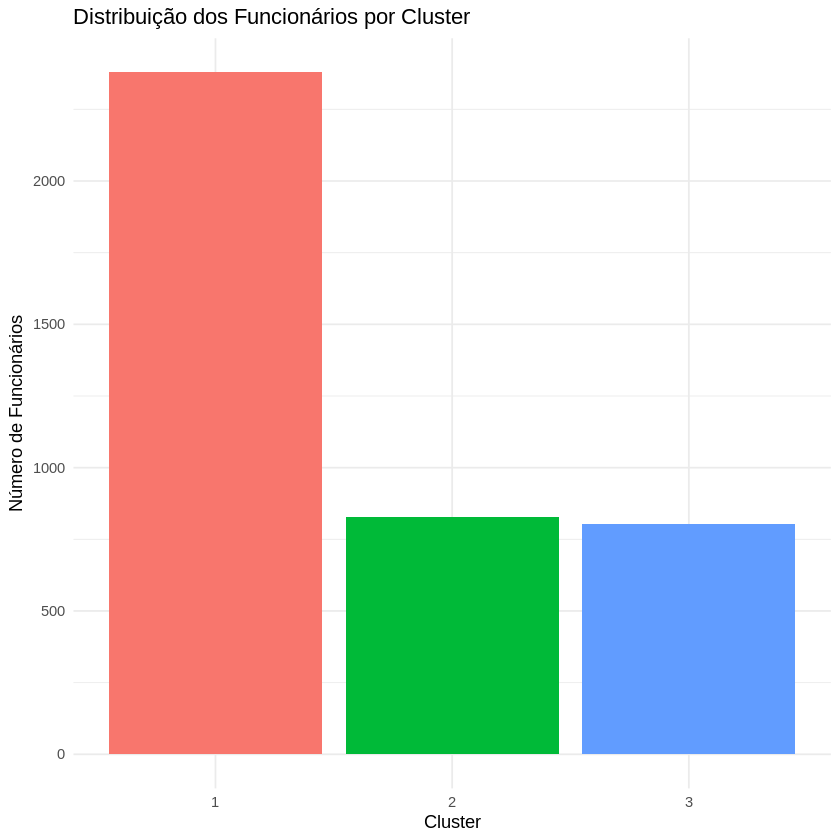

In [22]:
# Ajustando o número ótimo de clusters para 3, pois pelo gra´fico o maior valor
# do silhouette aparece em 3 clusters.
# Depois de 3 clusters, o silhouette cai e só volta a subir próximo de 8 a 10 clusters,
# mas esses aumentos são provavelmente devido à divisão de grupos já pequenos
# e pode não ser tão interpretável ou útil dada a restrição de até 10 grupos,

num_clusters <- 3
# Aplicando K-means com o número ótimo de clusters
kmeans_result <- kmeans(ind_coords, centers = num_clusters, nstart = 25)

# Adicionando os clusters aos dados originais
dados_com_clusters <- dados_preparados
dados_com_clusters$Cluster <- as.factor(kmeans_result$cluster)

# Analisando os clusters
summary_clusters <- dados_com_clusters %>%
  group_by(Cluster) %>%
  summarise(
    N = n(),
    Atividade1_MaisComum = names(sort(table(Atividade1), decreasing = TRUE))[1],
    Atividade2_MaisComum = names(sort(table(Atividade2), decreasing = TRUE))[1],
    Atividade3_MaisComum = names(sort(table(Atividade3), decreasing = TRUE))[1],
    Departamento_MaisComum = names(sort(table(dept_ID), decreasing = TRUE))[1],
    Divisao_MaisComum = names(sort(table(Division_ID), decreasing = TRUE))[1],
    Escritorio_MaisComum = names(sort(table(office_ID), decreasing = TRUE))[1]
  )

kable(summary_clusters, caption = "Características dos Clusters Identificados")

# Visualizando a distribuição dos clusters
ggplot(dados_com_clusters, aes(x = Cluster, fill = Cluster)) +
  geom_bar() +
  labs(title = "Distribuição dos Funcionários por Cluster",
       x = "Cluster", y = "Número de Funcionários") +
  theme_minimal() +
  theme(legend.position = "none")



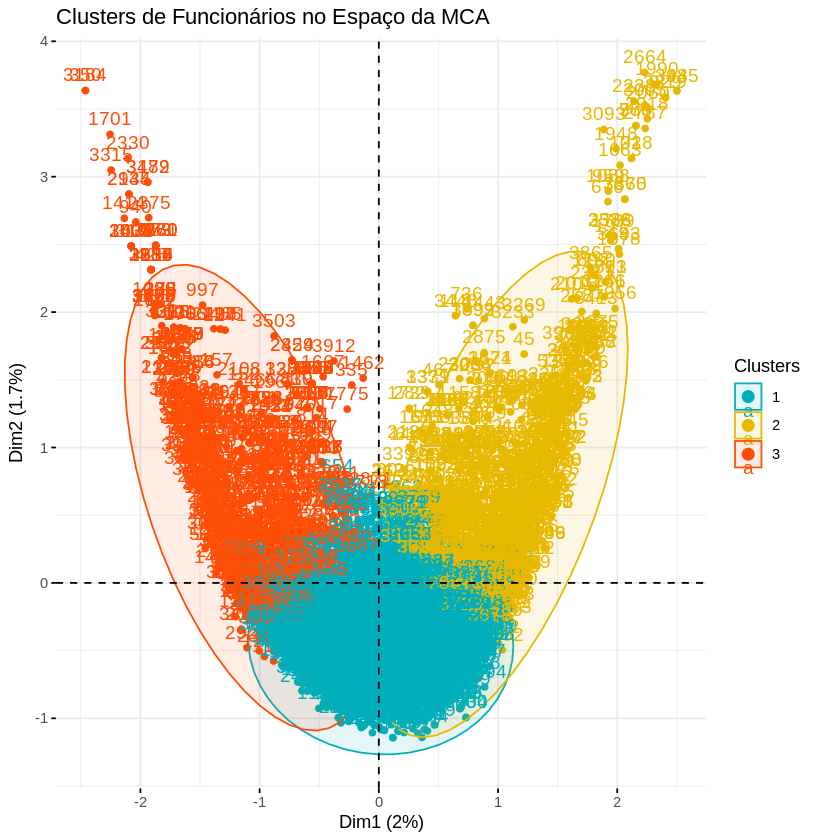

In [23]:
# Visualizando os clusters no espaço da MCA
fviz_mca_ind(mca_result,
             col.ind = as.factor(kmeans_result$cluster),
             palette = c("#00AFBB", "#E7B800", "#FC4E07", "#7CAE00", "#C77CFF",
                         "#00BFC4", "#F8766D", "#A3A500", "#00B0F6", "#E76BF3"),
             addEllipses = TRUE,
             legend.title = "Clusters",
             title = "Clusters de Funcionários no Espaço da MCA")

# Identificação de Grupos com Kmodes
# Justificativa da Abordagem
# Para identificar grupos de funcionários com base em suas preferências de atividades de lazer, utilizarei uma combinação de Análise de Correspondência Múltipla (MCA) seguida por agrupamento K-modes. Esta abordagem é justificada pelos seguintes motivos:
#
# MCA (Análise de Correspondência Múltipla): Como todas as variáveis são categóricas, a MCA é adequada para reduzir a dimensionalidade e capturar padrões de associação entre as categorias das variáveis. Isso nos permitirá visualizar as relações entre as diferentes atividades e identificar dimensões latentes nos dados.
# K-modes: Após a redução de dimensionalidade com MCA, aplicaremos o algoritmo K-modes, que é uma variação do K-means adequada para dados categóricos. O K-modes usa modas em vez de médias para definir os centróides e mede a dissimilaridade pelo número de discordâncias entre as observações.
# Esta combinação permite-nos:
#
# Lidar eficazmente com a natureza categórica dos dados
# Reduzir a dimensionalidade antes do agrupamento, o que pode melhorar a qualidade dos clusters
# Identificar grupos significativos sem exceder o limite de 10 grupos estabelecido pela empresa













Table: Importância das Variáveis na Árvore de Decisão

|           | Importancia|Variavel   |
|:----------|-----------:|:----------|
|Atividade2 |   1383.3693|Atividade2 |
|Atividade3 |    610.2147|Atividade3 |
|Atividade1 |    415.1530|Atividade1 |

ERROR: [1m[33mError[39m in `summarise()`:[22m
[1m[22m[36mℹ[39m In argument: `Departamentos_Principais = paste(...)`.
[36mℹ[39m In group 1: `Cluster = 1`.
[1mCaused by error:[22m
[33m![39m object 'Departamento' not found


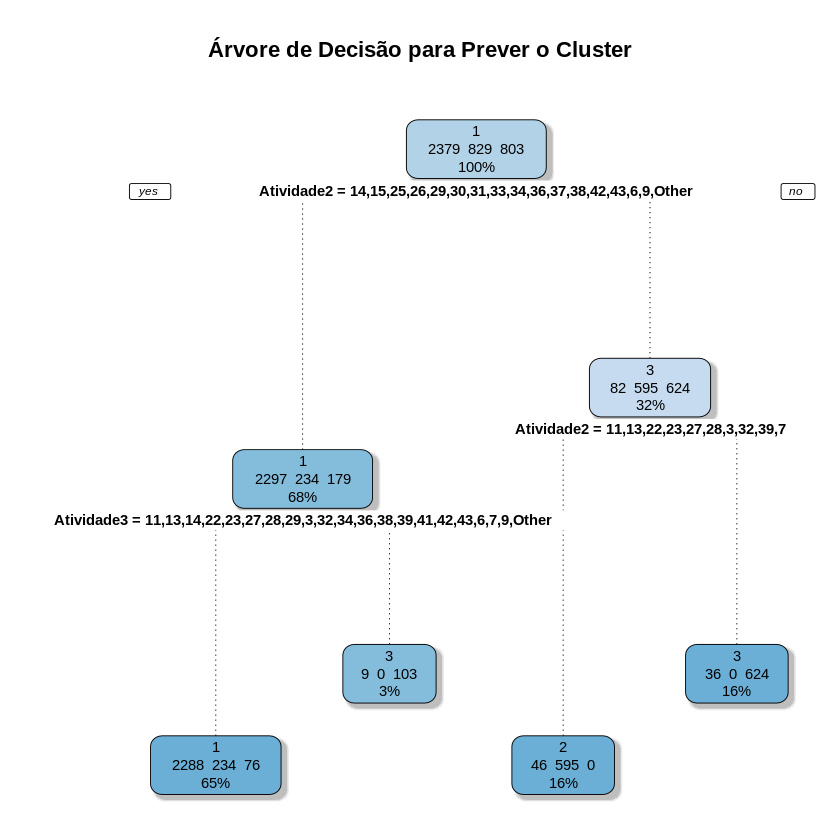

In [24]:
# Análise de Árvore de Decisão para Prever o Perfil
# Treinando uma árvore de decisão para prever o cluster com base nas atividades
arvore_decisao <- rpart(Cluster ~ Atividade1 + Atividade2 + Atividade3,
                        data = dados_com_clusters,
                        method = "class",
                        control = rpart.control(maxdepth = 3))
# Visualizando a árvore de decisão
rpart.plot(arvore_decisao, extra = 101, box.palette = "Blues",
           branch.lty = 3, shadow.col = "gray",
           main = "Árvore de Decisão para Prever o Cluster")

# Importância das variáveis na árvore de decisão
importancia_var <- as.data.frame(arvore_decisao$variable.importance)
importancia_var$Variavel <- rownames(importancia_var)
colnames(importancia_var) <- c("Importancia", "Variavel")
importancia_var <- importancia_var[order(-importancia_var$Importancia), ]

kable(importancia_var, caption = "Importância das Variáveis na Árvore de Decisão")

# Conclusões e Interpretação dos Resultados
# Gerando um resumo dos clusters
resumo_clusters <- dados_com_clusters %>%
  group_by(Cluster) %>%
  summarise(
    N = n(),
    Percentual = round(N / nrow(dados_com_clusters) * 100, 2),
    Atividades_Principais = paste(
      names(sort(table(Atividade1), decreasing = TRUE)[1:3]),
      collapse = ", "),
    Departamentos_Principais = paste(
      names(sort(table(Departamento), decreasing = TRUE)[1:min(3, n_distinct(dept_ID))]),
      collapse = ", "),
    Divisoes_Principais = paste(
      names(sort(table(Divisao), decreasing = TRUE)[1:min(3, n_distinct(Division_ID))]),
      collapse = ", "),
    Escritorios_Principais = paste(
      names(sort(table(Escritorio), decreasing = TRUE)[1:min(3, n_distinct(office_ID))]),
      collapse = ", ")
  )

kable(resumo_clusters, caption = "Resumo dos Clusters Identificados")



In [ ]:
# Salvando os resultados em um arquivo CSV
write.csv(dados_com_clusters, "funcionarios_com_clusters.csv", row.names = FALSE)
